# Data Analyst Associate Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.



## Task 1



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

df = pd.read_csv("pet_supplies_2212.csv")

df.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1


See dataframe info and number of missing values by columns

In [3]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   object 
 5   sales            1500 non-null   float64
 6   rating           1350 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 93.9+ KB


product_id           0
category             0
animal               0
size                 0
price                0
sales                0
rating             150
repeat_purchase      0
dtype: int64

**Column product_id** correct, missing null values and all values uniq

In [4]:
print(df["product_id"].unique().shape[0])
print(df["product_id"].isnull().sum())

1500
0


**Column category** was not entirely correct. Missing values were placed as "_", replaced with "Unknown"

In [5]:
print(df["category"].unique().shape[0])
print(df["category"].unique())
print(df["category"].isnull().sum())
df["category"] = df["category"].str.replace("-", "Unknown")
print(df["category"].unique())

7
['Food' 'Housing' 'Medicine' 'Toys' 'Equipment' 'Accessory' '-']
0
['Food' 'Housing' 'Medicine' 'Toys' 'Equipment' 'Accessory' 'Unknown']


**Column animal** correct, missing null values and all values in list Dog, Cat, Fish, Bird.

In [6]:
print(df["animal"].unique().shape[0])
print(df["animal"].unique())
print(df["animal"].isnull().sum())


4
['Bird' 'Dog' 'Cat' 'Fish']
0


**Column size** was not entirely correct. Animal sizes were written in different word formats. Coerced all values to the correct format, like Large, Medium, Small

In [7]:
print(df["size"].unique().shape[0])
print(df["size"].unique())
print(df["size"].isnull().sum())
df["size"] = df["size"].str.capitalize()
print(df["size"].unique())


9
['large' 'MEDIUM' 'medium' 'small' 'Small' 'Large' 'SMALL' 'Medium'
 'LARGE']
0
['Large' 'Medium' 'Small']


**Column price** column was wrong. First, the data type was an object. Secondly, the value "unlisted" was present in the data.

First, I replaced all "unlisted" with nan , converted the column to float, and then replaced nan with the median of the column.

In [8]:
print(f"Type of column price: {df['price'].dtypes}")
df['price'] = df['price'].replace('unlisted', np.nan)
df['price'] = pd.to_numeric(df['price'])
df['price'].fillna(df['price'].median(), inplace = True)
print(f"Type of column price: {df['price'].dtypes}")
df['price'].describe()

Type of column price: object
Type of column price: float64


count    1500.000000
mean       29.288373
std         7.335749
min        12.850000
25%        25.000000
50%        28.065000
75%        33.142500
max        54.160000
Name: price, dtype: float64

**Column sales** correct, missing null values and all values allowable range

In [9]:
df['sales'].describe()

count    1500.000000
mean      996.597847
std       323.952676
min       286.940000
25%       747.420000
50%      1000.830000
75%      1158.157500
max      2255.960000
Name: sales, dtype: float64

**Column rating** was not entirely correct. There were 150 missing values, according to the task, they were replaced with 0

In [10]:
print(df["rating"].unique())
print(df["rating"].isnull().sum())
df.fillna(0, inplace = True)
print(df["rating"].unique())
print(df["rating"].isnull().sum())

[ 7.  6.  5.  4.  8.  1.  3. nan  2.  9.]
150
[7. 6. 5. 4. 8. 1. 3. 0. 2. 9.]
0


**Column repeat_purchase** correct, missing null values and all values allowable range

In [11]:
print(df["repeat_purchase"].unique())
print(df["repeat_purchase"].isnull().sum())

[1 0]
0


The data was successfully read and put in order. We conducted the dataset in accordance with the criteria described in the task.
It was necessary to transform the data, replace gaps / non-corret values, or convert the data storage format.

## Task 2

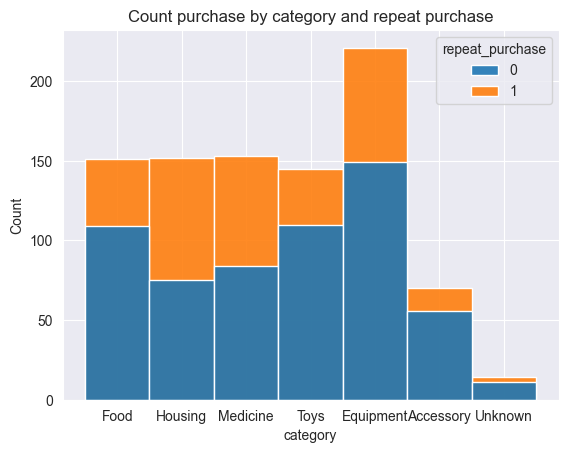

In [12]:
sns.histplot(x='category', hue='repeat_purchase', alpha=0.9, data=df)
plt.title('Count purchase by category and repeat purchase')
plt.show()

According to the chart above, the largest number of repeat purchases and purchases is in the Equipment segment.

At the same time, the observations are not balanced by category. Eg:
- In the Accessory category, almost half of all purchases are repeat purchases. And in the Housing category, the number of repeat purchases is twice as high as the number of first purchases.
- The number of repeat purchases in the categories Food, Housing, Medicine, Toys is similar, but the number of initial purchases is different.
- The Equipment category has the most purchases, both repeated and not.

## Task 3

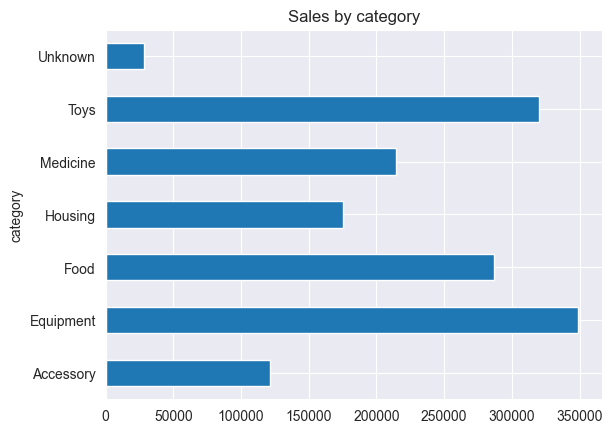

In [13]:
df.groupby('category')['sales'].sum().plot(kind='barh')
plt.title("Sales by category")
plt.show()

According to the chart above, our most profitable categories are Toys, Food and Equipment

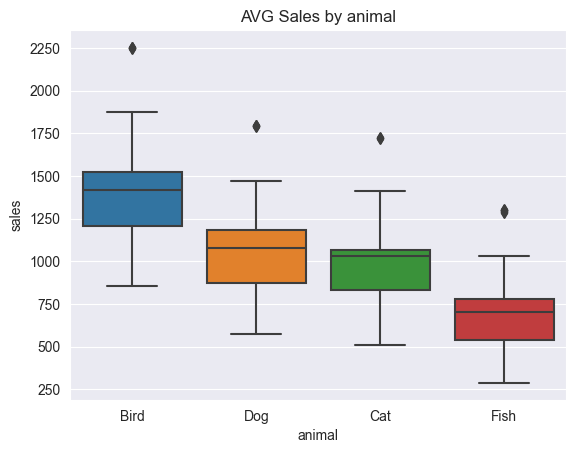

In [14]:
sns.boxplot(x=df.animal, y=df.sales)
plt.title("AVG Sales by animal")
plt.show()

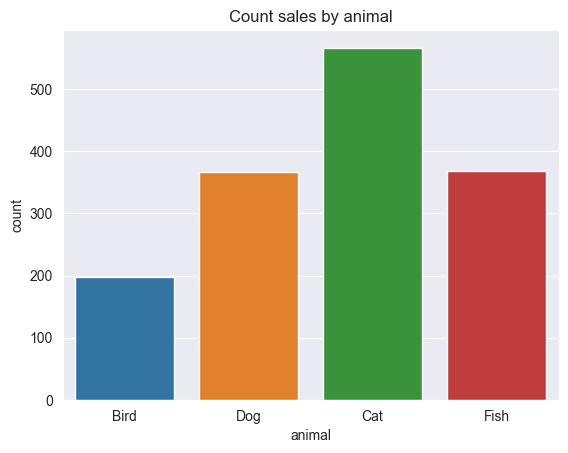

In [15]:
sns.countplot(x=df.animal)
plt.title("Count sales by animal")
plt.show()

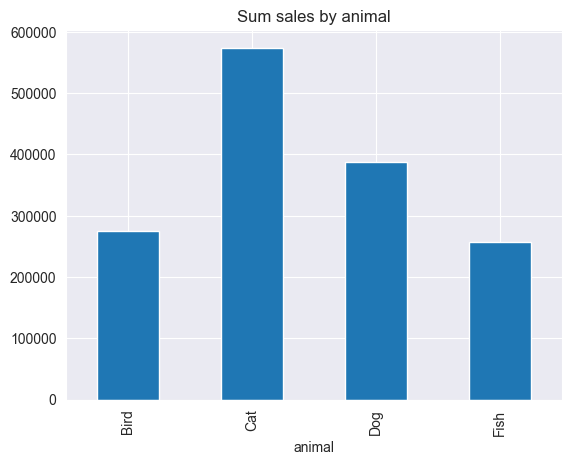

In [16]:
df.groupby('animal')['sales'].sum().plot(kind='bar')
plt.title("Sum sales by animal")
plt.show()

Birds have the highest average bill for a product. At the same time, we sell the least products for birds, and most of all for cats. Dogs and fish are on the same level.

As a result, cats are the most profitable animals for us in terms of sales, followed by dogs. And fish and birds occupy approximately the same position behind.

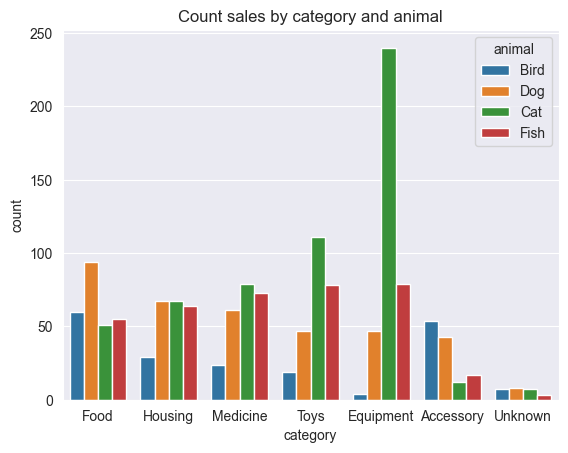

In [17]:
sns.countplot(x='category', hue='animal', data=df)
plt.title("Count sales by category and animal")
plt.show()

Most of all we sell Equipment and Toys for cats. Also dog food.

C:\Users\admin\AppData\Local\Temp\ipykernel_3680\4041032693.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = df.rating, y=df.sales, ci = None)


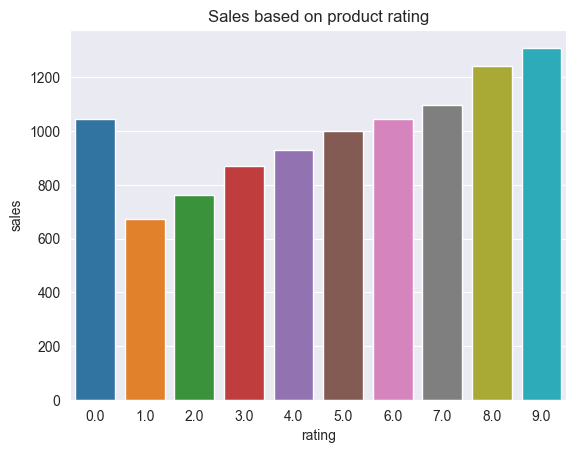

In [18]:
sns.barplot(x = df.rating, y=df.sales, ci = None)
plt.title("Sales based on product rating")
plt.show()

The higher the rating of the product, the more we earn on it on average. At the same time, for products that did not have a rating, sales correspond to the average rating.

## Task 4

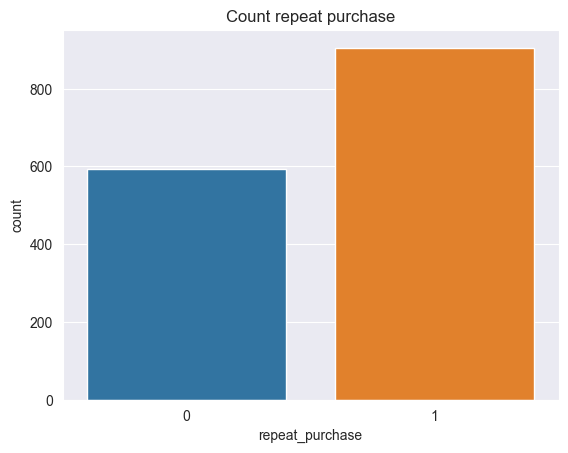

In [19]:
sns.countplot(x=df.repeat_purchase, data=df)
plt.title('Count repeat purchase')
plt.show()

According to the chart above, more than half of all purchases are repeat purchases. And now more than half of count sales are repeat sales.

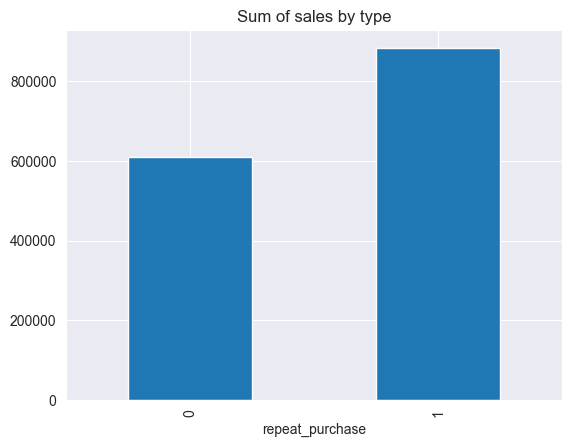

In [20]:
df.groupby('repeat_purchase')['sales'].sum().plot(kind='bar')
plt.title("Sum of sales by type")
plt.show()

And more than half of amount sales are repeat sales.

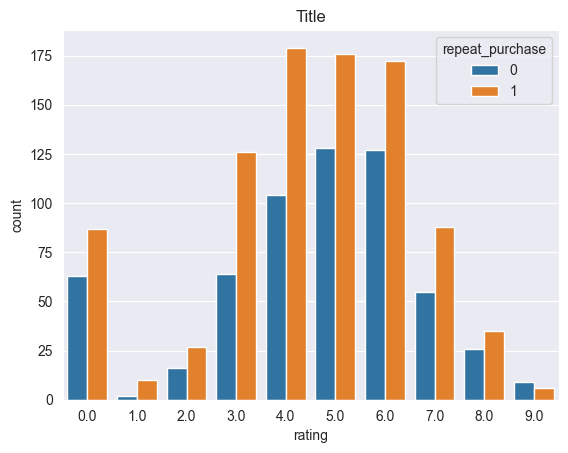

In [21]:
sns.countplot(x = df.rating, hue=df.repeat_purchase)
plt.title("Title")
plt.show()

For products with a rating of 3-8, the number of repeat sales is higher than regular ones. At the same time, for products with a rating of category 9, it is lower.

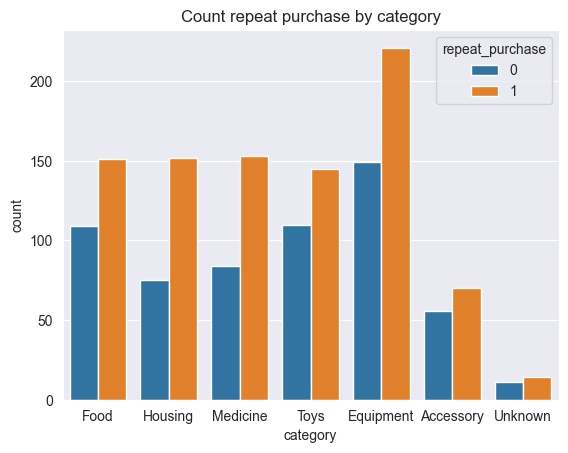

In [22]:
sns.countplot(x='category', hue='repeat_purchase', data=df)
plt.title('Count repeat purchase by category')
plt.show()

According to the chart, count repeat sales in the food category are now higher than first sales. The same can be said for all categories. Most repeat sales relative to regular sales in the category Housing and Medicine

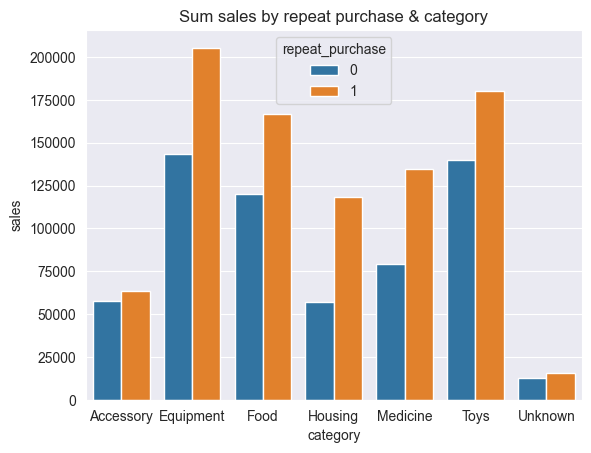

In [23]:
d = pd.DataFrame(df.groupby(['category','repeat_purchase'])['sales'].sum())
d = d.reset_index()
sns.barplot(x=d.category, y=d.sales, hue=d.repeat_purchase)
plt.title("Sum sales by repeat purchase & category")
plt.show()

We see the same thing looking at the amount of sales. The amount of repeat sales in the food category is higher than usual.

## **Conclusions:**
- More than half of all sales are repeat sales
- Over half of all revenue comes from repeat sales
- More than half of all sales in the Food category are repeat sales
- The most profitable categories by income are Toys, Food and Equipment
- Most of all we sell for cats, and we earn the most on them.
- At the same time, we have the lowest sales of food for cats.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam